<a href="https://colab.research.google.com/github/mananpatel126/ENEL-645-Group-13/blob/main/Project/Confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the necessary libraries...
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [ ]:
# Defining the directory path...
test_path = r'C:\Users\Manan Patel\Data_Mining Project\data\test'

gen_params = {"featurewise_center":False,\
              "samplewise_center":False,\
              "featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,\
              "zca_whitening":False,\
              "rotation_range":45,\
              "width_shift_range":0.1,\
              "height_shift_range":0.1, \
              "shear_range":0.1, \
              "horizontal_flip":True,\
              "vertical_flip":False}

test_batches = ImageDataGenerator(**gen_params, preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,  target_size=(224,224),  class_mode='categorical',  batch_size=120, interpolation="nearest", shuffle=True)

Found 1240 images belonging to 4 classes.


In [ ]:
# Getting test batch from the datasets.
imgs, labels = next(test_batches)
model = keras.models.load_model(r"C:\Users\Manan Patel\Data_Mining Project\data\TR_Test6.h5")

In [ ]:
classes = labels.shape[1]

In [ ]:
y_true=np.argmax(labels,axis=1)
yp = model.predict(imgs)
yp1=np.argmax(yp,axis=1)

In [ ]:
cm = tf.math.confusion_matrix(labels=y_true,predictions=yp1)

Text(51.0, 0.5, 'Truth lable')

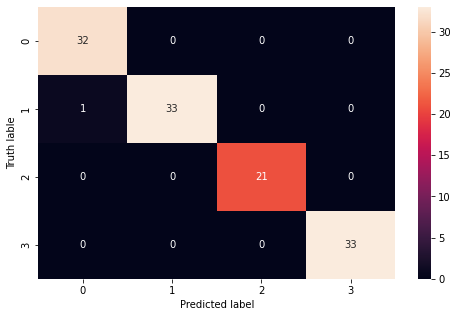

In [ ]:
# Printing the confusion matrix.
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('Truth lable')